In [3]:
import pandas as pd
import networkx as nx
import json
from networkx.algorithms import community
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns


In [4]:
# Load data
users = pd.read_csv('lastfm_asia_target.csv')
edges = pd.read_csv('lastfm_asia_edges.csv')
with open('lastfm_asia_features.json', 'r') as f:
    features = json.load(f)

# Inspect the columns in the users DataFrame
print(users.columns)

Index(['id', 'target'], dtype='object')


Exercise 1

In [5]:
# Create graph
G = nx.Graph()
G.add_edges_from(edges.values)

# Add user attributes
user_country = users.set_index('id')['target'].to_dict()
nx.set_node_attributes(G, user_country, 'country')

user_artists = {int(k): v for k, v in features.items()}
nx.set_node_attributes(G, user_artists, 'artists')

# Effect on the graph
num_nodes_before = G.number_of_nodes()
num_edges_before = G.number_of_edges()
print(f"Number of nodes before filtering: {num_nodes_before}")
print(f"Number of edges before filtering: {num_edges_before}")

# Filter nodes with degree < 2
nodes_to_remove = [node for node, degree in dict(G.degree()).items() if degree < 2]
G.remove_nodes_from(nodes_to_remove)

# Effect on the graph
num_nodes_after = G.number_of_nodes()
num_edges_after = G.number_of_edges()
print(f"Number of nodes after filtering: {num_nodes_after}")
print(f"Number of edges after filtering: {num_edges_after}")


Number of nodes before filtering: 7624
Number of edges before filtering: 27806
Number of nodes after filtering: 5870
Number of edges after filtering: 26052


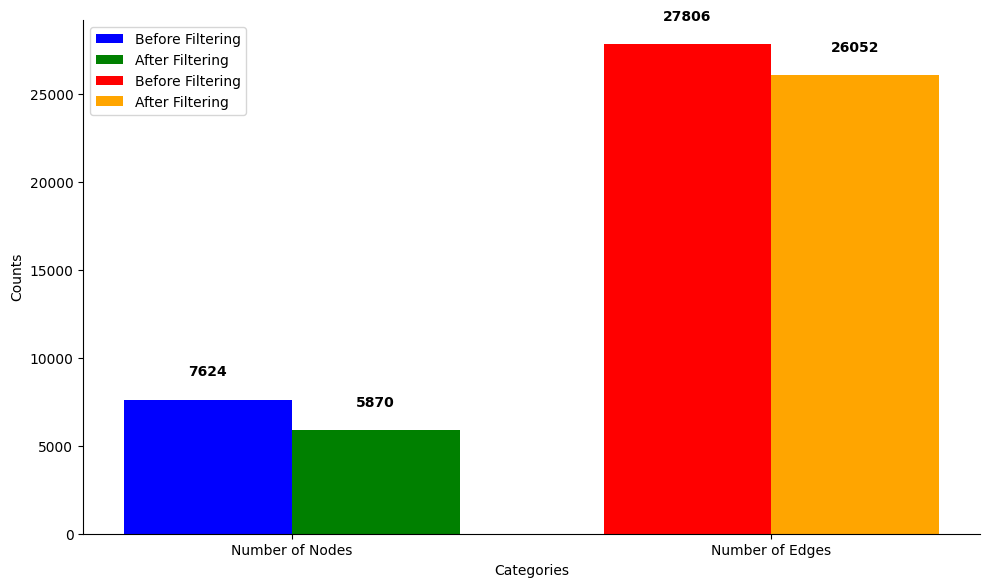

In [6]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = [1, 2]  # Two categories: nodes and edges

# Plot bars for nodes
bar1 = ax.bar(index[0] - bar_width/2, num_nodes_before, bar_width, label='Before Filtering', color='b')
bar2 = ax.bar(index[0] + bar_width/2, num_nodes_after, bar_width, label='After Filtering', color='g')

# Plot bars for edges
bar3 = ax.bar(index[1] - bar_width/2, num_edges_before, bar_width, label='Before Filtering', color='r')
bar4 = ax.bar(index[1] + bar_width/2, num_edges_after, bar_width, label='After Filtering', color='orange')

# Function to add labels on top of bars with values
def add_labels(bars, values):
    for bar, value in zip(bars, values):
        for rect in bar:
            height = rect.get_height()
            ax.annotate('{}'.format(int(value)),  # Add value as integer
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 15),  # 15 points vertical offset (to place above the height annotation)
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Add labels with values for nodes
add_labels([bar1, bar2], [num_nodes_before, num_nodes_after])

# Add labels with values for edges
add_labels([bar3, bar4], [num_edges_before, num_edges_after])

# Add labels, title, and legend
ax.set_xlabel('Categories')
ax.set_ylabel('Counts')
ax.set_title('')
ax.set_xticks(index)
ax.set_xticklabels(['Number of Nodes', 'Number of Edges'])
ax.legend()

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()

In [7]:
print(f'the graph: {G}')
# Convert any unsupported types (like lists) to strings
for node in G.nodes:
    if 'artists' in G.nodes[node]:
        artists = G.nodes[node]['artists']
        if isinstance(artists, list):
            G.nodes[node]['artists'] = ','.join(map(str, artists))

# Ensure attribute names are valid XML attribute names
# (Replace spaces with underscores, for example)
for node in G.nodes:
    if 'country' in G.nodes[node]:
        country_value = G.nodes[node]['country']
        if isinstance(country_value, str):
            G.nodes[node]['country'] = country_value.replace(' ', '_')
        # Handle cases where the attribute might not be a string (if needed)

# Write the graph to a GraphML file
nx.write_graphml(G, 'Network_analysis_exercise_1.graphml')

the graph: Graph with 5870 nodes and 26052 edges


Exercise 2

In [8]:
# Calculate graph characteristics
clustering_coefficient = nx.average_clustering(G)
try:
    diameter = nx.diameter(G)
except nx.NetworkXError:
    diameter = 'Graph is not connected'
density = nx.density(G)

print(f"Clustering Coefficient: {clustering_coefficient}")
print(f"Diameter: {diameter}")
print(f"Density: {density}")

Clustering Coefficient: 0.2981743317033169
Diameter: 13
Density: 0.001512407611615676


In [9]:
# Print results as table
table_data = [
    ["Clustering Coefficient", clustering_coefficient],
    ["Diameter", diameter],
    ["Density", density]
]

headers = ["Metric", "Value"]
print(tabulate(table_data, headers="firstrow", tablefmt="fancy_grid"))

╒══════════════════════════╤══════════════════════╕
│ Clustering Coefficient   │   0.2981743317033169 │
╞══════════════════════════╪══════════════════════╡
│ Diameter                 │          13          │
├──────────────────────────┼──────────────────────┤
│ Density                  │           0.00151241 │
╘══════════════════════════╧══════════════════════╛


Exercise 3

In [10]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Display top nodes
print("Top 10 Degree Centrality:", top_degree)
print("Top 10 Betweenness Centrality:", top_betweenness)
print("Top 10 Closeness Centrality:", top_closeness)
print("Top 10 Eigenvector Centrality:", top_eigenvector)

Top 10 Degree Centrality: [(7237, 0.03595161015505197), (524, 0.02896575225762481), (3530, 0.02879536547963878), (3450, 0.025558016697904244), (4785, 0.02487646958596013), (2510, 0.022831828250127792), (3597, 0.020446413358323395), (6101, 0.01908331913443517), (5127, 0.018572158800477082), (2854, 0.018401772022491054)]
Top 10 Betweenness Centrality: [(7237, 0.08875776593275092), (7199, 0.08768291886257537), (2854, 0.07344991122082563), (4356, 0.06632144594178388), (6101, 0.05032800647698856), (4338, 0.041721076431879285), (5454, 0.04120852487472623), (3450, 0.0365477470514115), (5127, 0.03561224943950242), (3103, 0.03431614893852469)]
Top 10 Closeness Centrality: [(7199, 0.3067475043119218), (7237, 0.30173255873734), (4356, 0.29695405788301965), (2854, 0.29411175144074164), (5454, 0.2934206579342066), (6101, 0.28786541102609375), (3544, 0.2874987753502498), (5127, 0.2872876792794557), (3450, 0.2851105173670148), (4900, 0.28269351187322384)]
Top 10 Eigenvector Centrality: [(7237, 0.2555

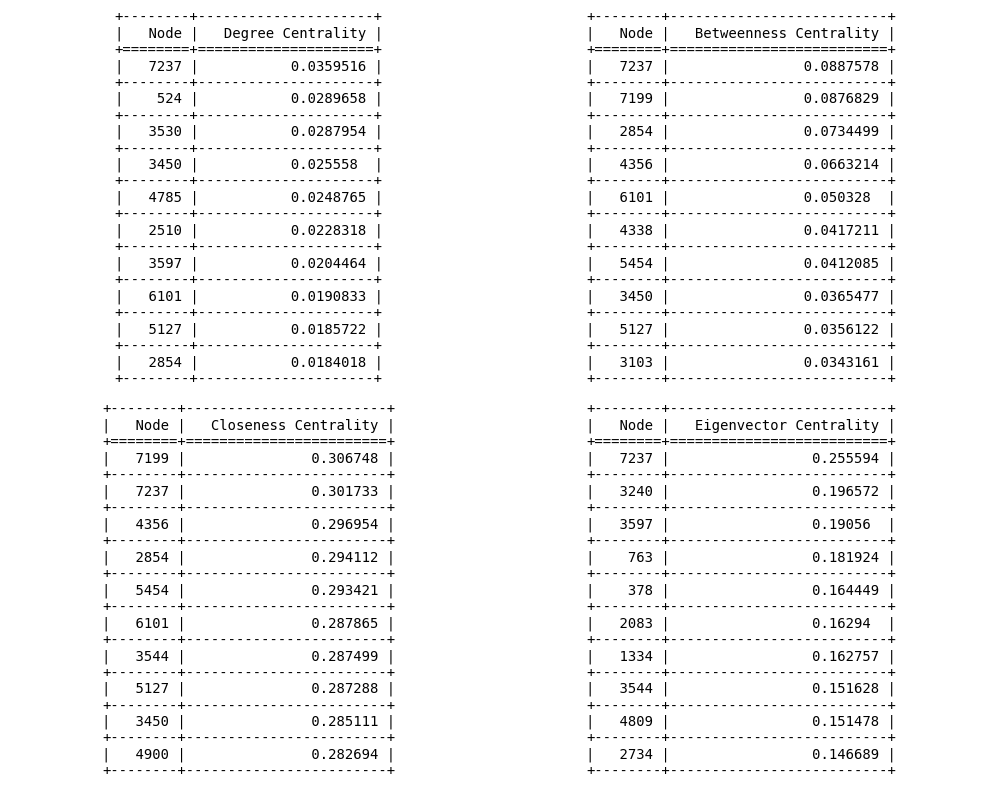

In [11]:
# Create tables
table_degree = tabulate(top_degree, headers=["Node", "Degree Centrality"], tablefmt="grid")
table_betweenness = tabulate(top_betweenness, headers=["Node", "Betweenness Centrality"], tablefmt="grid")
table_closeness = tabulate(top_closeness, headers=["Node", "Closeness Centrality"], tablefmt="grid")
table_eigenvector = tabulate(top_eigenvector, headers=["Node", "Eigenvector Centrality"], tablefmt="grid")

# Create subplots for tables
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot each table with adjusted title position
axs[0, 0].axis('off')
table_title = axs[0, 0].text(0.5, 1.1,'' , fontsize=12, ha='center', va='center', fontweight='bold')
table_title.set_position([0.5, 1.1])

axs[0, 1].axis('off')
table_title = axs[0, 1].text(0.5, 1.1,'', fontsize=12, ha='center', va='center', fontweight='bold')
table_title.set_position([0.5, 1.1])

axs[1, 0].axis('off')
table_title = axs[1, 0].text(0.5, 1.1,'',  fontsize=12, ha='center', va='center', fontweight='bold')
table_title.set_position([0.5, 1.1])

axs[1, 1].axis('off')
table_title = axs[1, 1].text(0.5, 1.1, '' ,fontsize=12, ha='center', va='center', fontweight='bold')
table_title.set_position([0.5, 1.1])

# Add tables to subplots
axs[0, 0].text(0.5, 0.9, table_degree, fontsize=10, ha='center', va='center', fontfamily='monospace')
axs[0, 1].text(0.5, 0.9, table_betweenness, fontsize=10, ha='center', va='center', fontfamily='monospace')
axs[1, 0].text(0.5, 0.9, table_closeness, fontsize=10, ha='center', va='center', fontfamily='monospace')
axs[1, 1].text(0.5, 0.9, table_eigenvector, fontsize=10, ha='center', va='center', fontfamily='monospace')

plt.tight_layout()
plt.show()

Exercise 4

In [12]:
# Create DataFrame for centrality measures
centrality_df = pd.DataFrame({
    'Degree': degree_centrality,
    'Betweenness': betweenness_centrality,
    'Closeness': closeness_centrality,
    'Eigenvector': eigenvector_centrality
})

# Calculate correlation matrix
correlation_matrix = centrality_df.corr()


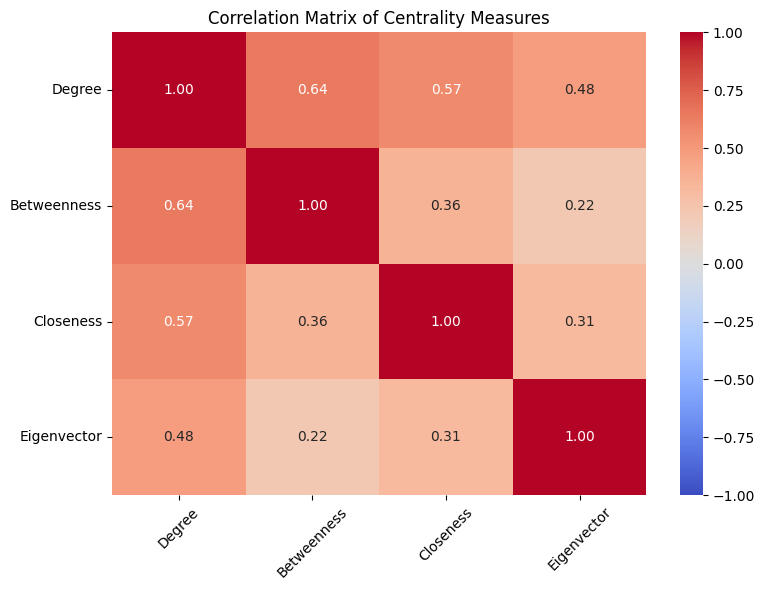

In [13]:

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size if necessary

# Generate a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# Customize labels, title, and ticks
plt.title('Correlation Matrix of Centrality Measures')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()

Exercise 5

In [14]:
nodes_attributes = pd.read_csv('/content/Gephi output to networkx attributes.csv')
print(nodes_attributes.columns)
nodes_attributes = nodes_attributes[['Id','Label', 'modularity_class']]
nodes_attributes.rename(columns= {'d0': 'Country', 'd1': 'artists'}, inplace = True)
nodes_attributes

Index(['Id', 'Label', 'd1', 'd0', 'Degree', 'Weighted Degree', 'Eccentricity',
       'closnesscentrality', 'harmonicclosnesscentrality',
       'betweenesscentrality', 'clustering', 'triangles', 'eigencentrality',
       'modularity_class'],
      dtype='object')


,Id,Label,modularity_class
0,747,747,21
1,1,1,9
2,4257,4257,9
3,2194,2194,5
4,6478,6478,9
...,...,...,...
5865,6669,6669,12
5866,7578,7578,4
5867,6371,6371,9
5868,6518,6518,5


In [15]:
node_attributes = nodes_attributes.set_index('Id').to_dict('index')
nx.set_node_attributes(G, node_attributes)

In [16]:
# Calculate basic community statistics
community_stats = {}
for node, data in G.nodes(data=True):
    community = data['modularity_class']
    if community not in community_stats:
        community_stats[community] = {'nodes': set(), 'internal_edges': 0, 'external_edges': 0}
    community_stats[community]['nodes'].add(node)

# Calculate internal and external edges
for community, stats in community_stats.items():
    for node in stats['nodes']:
        for neighbor in G.neighbors(node):
            if neighbor in stats['nodes']:
                stats['internal_edges'] += 1
            else:
                stats['external_edges'] += 1
    stats['internal_edges'] //= 2  # Each edge is counted twice

# Convert to DataFrame for easy analysis
community_stats_df = pd.DataFrame.from_dict(community_stats, orient='index')
community_stats_df['size'] = community_stats_df['nodes'].apply(len)
community_stats_df['density'] = community_stats_df['internal_edges'] / (community_stats_df['size'] * (community_stats_df['size'] - 1) / 2)
community_stats_df = community_stats_df.reset_index()

community_stats_df.rename(columns = {'index': 'Community'}, inplace = True)
community_stats_df[['Community', 'internal_edges', 'external_edges', 'size', 'density']].head(22).sort_values(by = 'Community')

,Community,internal_edges,external_edges,size,density
12,0,422,115,147,0.039325
8,1,19,15,10,0.422222
7,2,1570,323,263,0.045569
11,3,245,29,68,0.107550
6,4,4360,397,789,0.014025
2,5,3246,432,739,0.011904
13,6,48,5,12,0.727273
16,7,126,37,47,0.116559
10,8,10,5,8,0.357143
1,9,4469,621,1204,0.006171


In [17]:
all_attributes = set()
for node, attrs in G.nodes(data=True):
    all_attributes.update(attrs.keys())

# Display all possible attributes
print("All possible attributes:")
for attribute in all_attributes:
    print(attribute)

All possible attributes:
modularity_class
artists
country
Label


<Figure size 800x600 with 0 Axes>

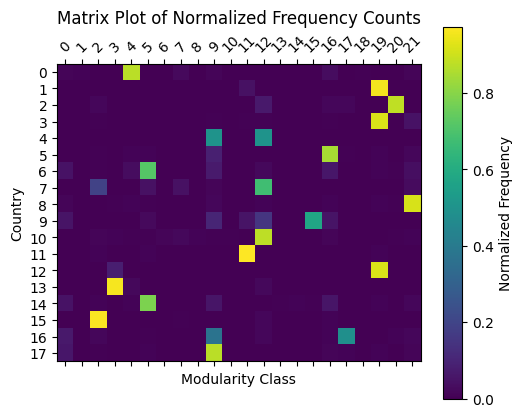

In [18]:
# Extract node attributes into a DataFrame
nodes_data = [{'Id': node, 'Country': data['country'], 'modularity_class': data['modularity_class']}
              for node, data in G.nodes(data=True)]
nodes_attributes = pd.DataFrame(nodes_data)

# Count frequencies using crosstab
frequency_table = pd.crosstab(nodes_attributes['Country'], nodes_attributes['modularity_class'])

# Normalize the frequency table by row sums
normalized_frequency_table = frequency_table.div(frequency_table.sum(axis=1), axis=0)

# Plot matrix plot
plt.figure(figsize=(8, 6))
plt.matshow(normalized_frequency_table, cmap='viridis')

# Customize plot
plt.xticks(range(len(normalized_frequency_table.columns)), normalized_frequency_table.columns, rotation=45)
plt.yticks(range(len(normalized_frequency_table.index)), normalized_frequency_table.index)
plt.xlabel('Modularity Class')
plt.ylabel('Country')
plt.colorbar(label='Normalized Frequency')

plt.title('Matrix Plot of Normalized Frequency Counts')
plt.show()

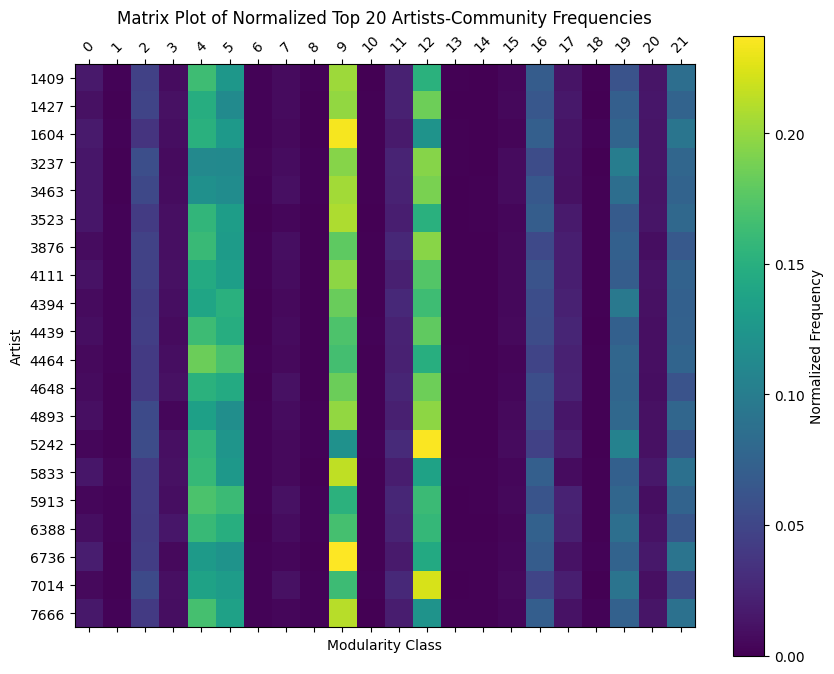

In [19]:
# Extract node attributes into a DataFrame
nodes_data = [{'Id': node, 'artists': data['artists'], 'modularity_class': data['modularity_class']}
              for node, data in G.nodes(data=True)]
nodes_attributes = pd.DataFrame(nodes_data)

# Count frequencies of each artist across all nodes
artist_freq = {}
for _, row in nodes_attributes.iterrows():
    artists = [artist.strip() for artist in row['artists'].split(',')]
    for artist in artists:
        if artist in artist_freq:
            artist_freq[artist] += 1
        else:
            artist_freq[artist] = 1

# Select top 20 artists based on frequency
top_artists = sorted(artist_freq.items(), key=lambda x: x[1], reverse=True)[:20]
top_artists = [artist for artist, _ in top_artists]

# Create a DataFrame to hold artist-community pairs for top 20 artists
artist_community_pairs = []
for _, row in nodes_attributes.iterrows():
    artists = [artist.strip() for artist in row['artists'].split(',')]
    for artist in artists:
        if artist in top_artists:
            artist_community_pairs.append({'artist': artist, 'modularity_class': row['modularity_class']})

artist_community_df = pd.DataFrame(artist_community_pairs)

# Count frequencies using crosstab
artist_community_freq = pd.crosstab(artist_community_df['artist'], artist_community_df['modularity_class'])

# Normalize the frequency table by row sums
normalized_artist_community_freq = artist_community_freq.div(artist_community_freq.sum(axis=1), axis=0)

# Plot matrix plot
plt.figure(figsize=(10, 8))
plt.matshow(normalized_artist_community_freq, cmap='viridis', fignum=1)

# Customize plot
plt.xticks(range(len(normalized_artist_community_freq.columns)), normalized_artist_community_freq.columns, rotation=45)
plt.yticks(range(len(normalized_artist_community_freq.index)), normalized_artist_community_freq.index)
plt.xlabel('Modularity Class')
plt.ylabel('Artist')
plt.colorbar(label='Normalized Frequency')

plt.title('Matrix Plot of Normalized Top 20 Artists-Community Frequencies')
plt.show()

In [20]:
nodes_attributes

,Id,artists,modularity_class
0,747,"2397,6371,6028,1599,3900,7377,5868,3389,5386,1...",21
1,1,"7375,1890,2400,1122,980,1441,6283,2907,7387,98...",9
2,4257,"3811,1435,4890,4427,3389,5,2967,7362,4404,1441...",9
3,2194,"7373,2397,3718,3975,5,5874,3906,2904,5875,1441...",5
4,6478,"2399,3382,6028,3389,1441,7829,4406,6388,5882,5...",9
...,...,...,...
5865,6669,"5865,2398,1890,5632,2402,3718,509,3389,1733,69...",12
5866,7578,"7626,7627,5378,3634,1652,1599,5334,238,5615,51...",4
5867,6371,"506,2488,2459,7429,2808,7383,2905,6387,1498,39...",9
5868,6518,"5378,6710,3900,2400,6895,2321,3389,5,4402,513,...",5


Exercise 7

In [21]:
# Link prediction using Jaccard Coefficient
jc_preds = list(nx.jaccard_coefficient(G))
jc_preds_sorted = sorted(jc_preds, key=lambda x: x[2], reverse=True)[:10]

# Link prediction using Preferential Attachment
pa_preds = list(nx.preferential_attachment(G))
pa_preds_sorted = sorted(pa_preds, key=lambda x: x[2], reverse=True)[:10]

print("Top 10 Jaccard Coefficient Predictions:", jc_preds_sorted)
print("Top 10 Preferential Attachment Predictions:", pa_preds_sorted)

Top 10 Jaccard Coefficient Predictions: [(42, 234, 1.0), (350, 6677, 1.0), (391, 2801, 1.0), (583, 6824, 1.0), (755, 1063, 1.0), (874, 4579, 1.0), (1076, 4351, 1.0), (1076, 7181, 1.0), (1123, 3903, 1.0), (1252, 7283, 1.0)]
Top 10 Preferential Attachment Predictions: [(524, 7237, 35870), (3530, 7237, 35659), (3450, 7237, 31650), (4785, 7237, 30806), (524, 3530, 28730), (2510, 7237, 28274), (524, 3450, 25500), (524, 4785, 24820), (3530, 4785, 24674), (6101, 7237, 23632)]


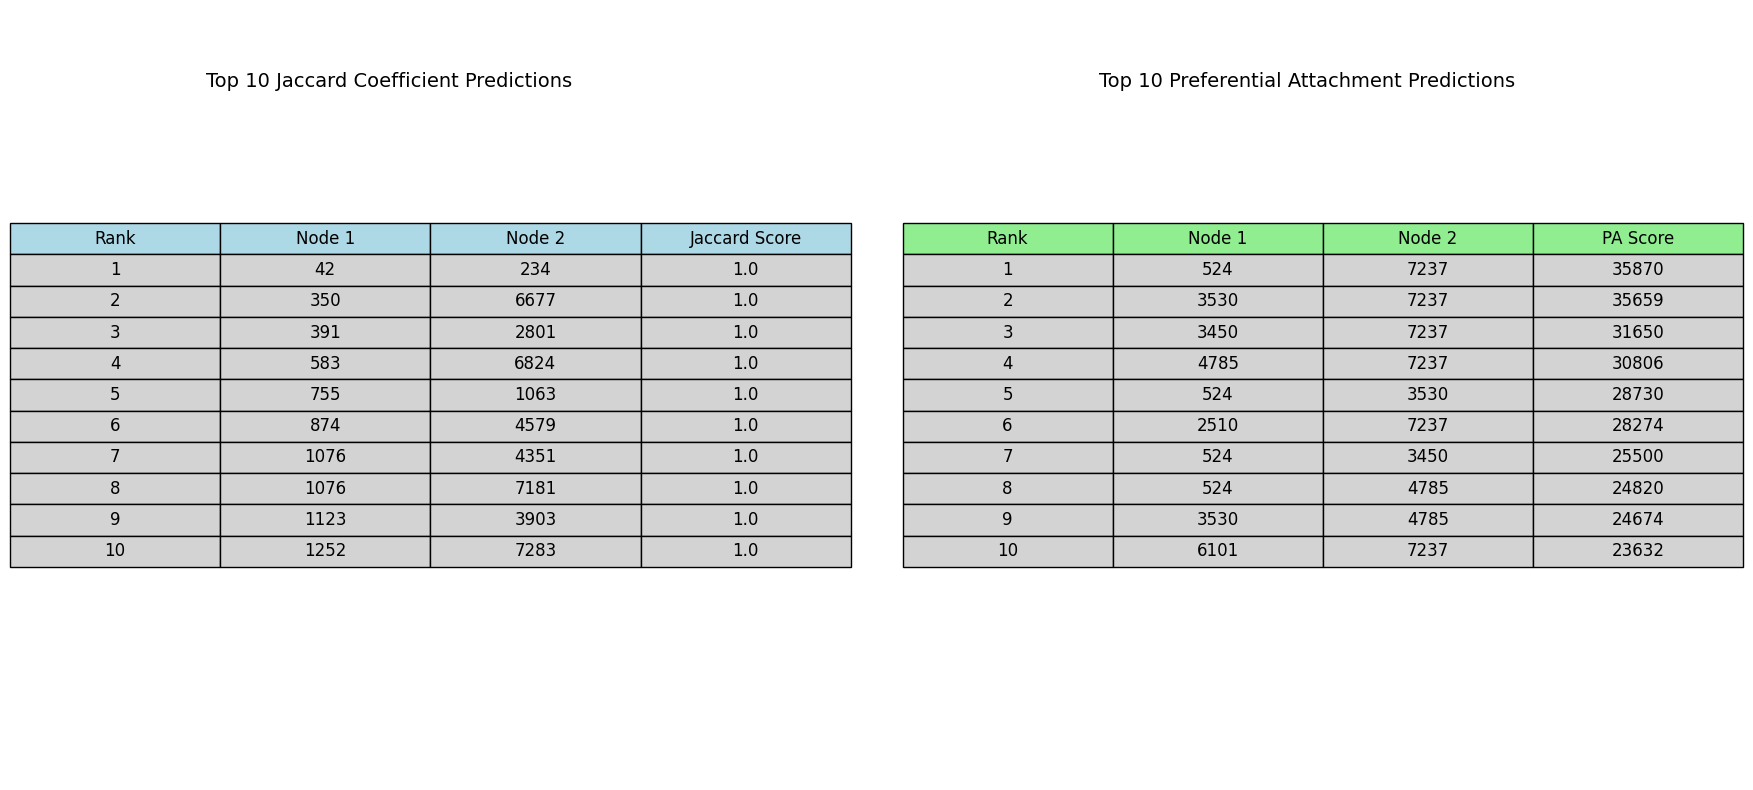

In [22]:
# Prepare data for tables
jc_table_data = [[rank + 1, jc_preds[0], jc_preds[1], jc_preds[2]] for rank, jc_preds in enumerate(jc_preds_sorted[:10])]
pa_table_data = [[rank + 1, pa_preds[0], pa_preds[1], pa_preds[2]] for rank, pa_preds in enumerate(pa_preds_sorted[:10])]

# Plotting the tables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Table 1: Jaccard Coefficient Predictions
ax1.text(0.1, 0.9, 'Top 10 Jaccard Coefficient Predictions', fontsize=14, transform=ax1.transAxes)
table1 = ax1.table(cellText=jc_table_data, colLabels=['Rank', 'Node 1', 'Node 2', 'Jaccard Score'],
                   cellLoc='center', loc='center', colColours=['lightblue']*4, cellColours=[['lightgrey']*4]*10)
table1.auto_set_font_size(False)
table1.set_fontsize(12)
table1.scale(1.5, 1.5)  # Scale table for better visibility

# Table 2: Preferential Attachment Predictions
ax2.text(0.1, 0.9, 'Top 10 Preferential Attachment Predictions', fontsize=14, transform=ax2.transAxes)
table2 = ax2.table(cellText=pa_table_data, colLabels=['Rank', 'Node 1', 'Node 2', 'PA Score'],
                   cellLoc='center', loc='center', colColours=['lightgreen']*4, cellColours=[['lightgrey']*4]*10)
table2.auto_set_font_size(False)
table2.set_fontsize(12)
table2.scale(1.5, 1.5)  # Scale table for better visibility

# Hide axes
ax1.axis('off')
ax2.axis('off')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

Exercise 8

In [23]:
 # Prepare data for Excel
top_nodes = list(set([node for node, _ in top_degree + top_betweenness + top_closeness + top_eigenvector]))
top_nodes_data = []
for node in top_nodes:
    # Convert all elements in 'artists' list to strings
    artists_list = [str(artist) for artist in G.nodes[node].get('artists', [])]

    top_nodes_data.append([
        node,
        G.nodes[node].get('country', 'N/A'),
        degree_centrality.get(node, 0),
        betweenness_centrality.get(node, 0),
        closeness_centrality.get(node, 0),
        eigenvector_centrality.get(node, 0),
        G.nodes[node].get('modularity_class', 'N/A'),
        ", ".join(artists_list)  # Join strings, not integers
    ])

# Create DataFrame and save to Excel
top_nodes_df = pd.DataFrame(top_nodes_data, columns=['ID', 'Country', 'Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Eigenvector Centrality', 'Community', 'Artists'])
top_nodes_df.to_excel('top_nodes_analysis.xlsx', index=False)

In [24]:
top_nodes_df

,ID,Country,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,Community,Artists
0,4356,8,0.008008,0.066321,0.296954,0.008226,2,"2, 3, 9, 7, ,, 3, 1, 3, 1, ,, 4, 1, 5, 1, ,, 3..."
1,5127,17,0.018572,0.035612,0.287288,0.001312,9,"2, 1, 6, 7, ,, 7, 3, 5, 7, ,, 4, 8, 8, 6, ,, 2..."
2,524,15,0.028966,0.021553,0.256154,0.001113,2,"2, 3, 9, 7, ,, 3, 9, 0, 5, ,, 5, 0, 9, ,, 3, 3..."
3,3597,0,0.020446,0.009675,0.267771,0.190560,4,"5, 1, 3, 1, ,, 2, ,, 2, 4, 0, 1, ,, 2, 4, 0, 2..."
4,3103,10,0.013461,0.034316,0.271537,0.007788,12,"7, 5, 4, 7, ,, 5, 3, 7, 8, ,, 2, 6, 8, 9, ,, 1..."
5,7199,17,0.009542,0.087683,0.306748,0.000960,2,"6, 7, 4, 0, ,, 2, 2, 8, 3, ,, 3, 3, 8, 9, ,, 5..."
6,2083,0,0.015335,0.003633,0.263219,0.162940,4,"6, 0, 2, 8, ,, 6, 0, 2, 9, ,, 7, 6, 2, 7, ,, 4..."
7,4900,0,0.016187,0.026824,0.282694,0.144889,4,"3, 3, 8, 0, ,, 6, 3, 7, 2, ,, 5, 1, 3, 1, ,, 5..."
8,2854,0,0.018402,0.073450,0.294112,0.010939,16,"5, 8, 6, 7, ,, 3, 9, 0, 2, ,, 2, 4, 0, 1, ,, 2..."
9,3240,0,0.017039,0.012734,0.273116,0.196572,4,"7, 5, 4, 7, ,, 5, 3, 7, 9, ,, 2, 9, 0, 0, ,, 2..."
